<a href="https://colab.research.google.com/github/sajidkhan2067/DDoSAttackDataSets/blob/main/LSTM/Bidirectional_LSTM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required modules.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import ipaddress

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

# number_of_samples determine the highest number of samples(rows) from the attack and normal dataset should be read and used.

In [ ]:
# number of benign traffic row = 2*number_of_samples
number_of_samples = 10000  
# number of attack traffic row = number_of_samples_attack
number_of_samples_attack =20000

In [ ]:
# First, we get the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data from attack and normal datasets.

In [ ]:
data_attack = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/udpflood.pcap_Flow.csv', nrows = number_of_samples)
data_attack_tcpsyn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/tcpsyn.pcap_Flow.csv', nrows = number_of_samples)
data_attack_tcprst = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/tcprst.pcap_Flow.csv', nrows = number_of_samples)
data_attack_tcppush = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/tcppush.pcap_Flow.csv', nrows = number_of_samples)
data_attack_tcpfin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/tcpfin.pcap_Flow.csv', nrows = number_of_samples)

In [ ]:
data_normal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/normal.pcap_Flow.csv',nrows = number_of_samples)
data_normal_slice2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/secondslice.pcap_Flow.csv',nrows = number_of_samples)
print(data_normal.shape)

(10000, 85)


**List of columns that are in the .csv files.**

In [ ]:
data_normal.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_normal_slice2.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack_tcpsyn.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack_tcprst.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack_tcppush.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack_tcpfin.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']


# Drop unwanted columns

In [ ]:
data_normal.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_normal_slice2.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack_tcpsyn.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack_tcprst.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack_tcppush.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']
data_attack_tcpfin.columns=[ 'Flow ID','Src IP','Src Port','Dst IP','Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label','Slice']

In [ ]:
data_normal = data_normal.replace([np.inf, -np.inf], np.nan)
data_attack = data_attack.replace([np.inf, -np.inf], np.nan)
data_attack_tcpsyn = data_attack_tcpsyn.replace([np.inf, -np.inf], np.nan)
data_attack_tcprst = data_attack_tcprst.replace([np.inf, -np.inf], np.nan)
data_attack_tcppush = data_attack_tcppush.replace([np.inf, -np.inf], np.nan)
data_attack_tcpfin = data_attack_tcpfin.replace([np.inf, -np.inf], np.nan)

In [ ]:
features=[ 'Flow Duration','Dst IP','Dst Port', 'Fwd Pkt Len Std','Src IP',
       'Src Port', 'ACK Flag Cnt', 'Protocol','Tot Fwd Pkts',
       'Fwd Seg Size Min','Slice']

In [ ]:
# Converting IP addresses into Integer values
data_normal['Dst IP'] = data_normal['Dst IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_normal_slice2['Dst IP'] = data_normal_slice2['Dst IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack['Dst IP'] = data_attack['Dst IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack_tcpsyn['Dst IP'] = data_attack_tcpsyn['Dst IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack_tcprst['Dst IP'] = data_attack_tcprst['Dst IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack_tcppush['Dst IP'] = data_attack_tcppush['Dst IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack_tcpfin['Dst IP'] = data_attack_tcpfin['Dst IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_normal['Src IP'] = data_normal['Src IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_normal_slice2['Src IP'] = data_normal_slice2['Src IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack['Src IP'] = data_attack['Src IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack_tcpsyn['Src IP'] = data_attack_tcpsyn['Src IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack_tcprst['Src IP'] = data_attack_tcprst['Src IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack_tcppush['Src IP'] = data_attack_tcppush['Src IP'].apply(lambda x:  int(ipaddress.ip_address(x)))
data_attack_tcpfin['Src IP'] = data_attack_tcpfin['Src IP'].apply(lambda x:  int(ipaddress.ip_address(x)))

X_normal = pd.concat([pd.DataFrame(data_normal[features].values), pd.DataFrame(data_normal_slice2[features].values)], axis=0)

X_attack = pd.concat([pd.DataFrame(data_attack[features].values), pd.DataFrame(data_attack_tcpsyn[features].values), 
                      pd.DataFrame(data_attack_tcpsyn[features].values), pd.DataFrame(data_attack_tcppush[features].values),
                      pd.DataFrame(data_attack_tcpfin[features].values)], axis=0)

X_attack=X_attack.sample(n=number_of_samples_attack)
Y_normal = pd.concat([pd.DataFrame(data_normal['Label']), pd.DataFrame(data_normal_slice2['Label'])], axis=0)

Y_attack= pd.concat([pd.DataFrame(data_attack['Label']), pd.DataFrame(data_attack_tcpsyn['Label']), 
                      pd.DataFrame(data_attack_tcpsyn['Label']), pd.DataFrame(data_attack_tcppush['Label']),
                      pd.DataFrame(data_attack_tcpfin['Label'])], axis=0)
Y_attack=Y_attack.sample(n=number_of_samples_attack)
X=np.concatenate((X_normal,X_attack))

print(len(X))
print(len(X_normal))
print(len(X_attack))

Y_attack=Y_attack.values.flatten()
Y_normal=Y_normal.values.flatten()


Y=np.concatenate((Y_normal,Y_attack))



40000
20000
20000


# Standardise the data

In [ ]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)
# print(X)

# the class field, replace value 'attack' with 0 and 'normal' with 1

In [ ]:
for i in range(0,len(Y)):
  # print(Y[i])
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1
  
    

After feature transformation, we get a 𝑚×𝑛' matrix, where 𝑚 indicates the number of packets and 𝑛' indicates the number of new features after transformation. In order to learn patterns in both long and short term, we use a sliding window to separate continuous packets and reshape the data into a series of time windows with window size 𝑇. The label 𝑦 in each window illustrates the last packet. After reshaping, we have a three-dimensional matrix with shape (𝑚−𝑇 )×𝑇 ×𝑛'. Figure illustrates the workflow of feature extraction, transformation, and reshaping.
![dataset transformation](https://github.com/santhisenan/DeepDefense/blob/master/feature_extraction.png?raw=1)
In this way, we change the features from conventional packet-based to window-based, by which we can learn network patterns from both previous (𝑇 −1) packets and current packet.

In [ ]:
features = len(X[0])
# print(features)

samples = X.shape[0]
# print(samples)
train_len = 8
input_len = samples - train_len
# print(input_len )
# print(input_len)
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [ ]:
X.shape
# print(X.shape)
# print(Y.shape)
# print(Y)


(40000, 11)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[train_len:len(X)], test_size = 0.2)

# print(X_train)
# print(X_test)
print(Y_test[200:300])

[0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0]


The architecture used is 
![Model](https://github.com/santhisenan/DeepDefense/blob/master/model_brnn.png?raw=1)

In [ ]:
def create_baseline():
    model = Sequential()
    
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [ ]:
model = create_baseline()
# print(Y_train[1000:len(Y_train)])


In [ ]:
# print(X_train)

Y_train=Y_train.astype(float)
# print(Y_train)
 
history = model.fit(X_train, Y_train, epochs = 40,validation_split=0.2, verbose = 1)
print(model.summary())

Epoch 1/40
800/800 [==============================] - 15s 13ms/step - loss: 0.1680 - accuracy: 0.9982 - val_loss: 0.0331 - val_accuracy: 0.9994
Epoch 2/40
800/800 [==============================] - 9s 11ms/step - loss: 0.0330 - accuracy: 0.9986 - val_loss: 0.0318 - val_accuracy: 0.9986
Epoch 3/40
800/800 [==============================] - 9s 12ms/step - loss: 0.0311 - accuracy: 0.9984 - val_loss: 0.0299 - val_accuracy: 0.9989
Epoch 4/40
800/800 [==============================] - 9s 11ms/step - loss: 0.0265 - accuracy: 0.9989 - val_loss: 0.0232 - val_accuracy: 0.9997
Epoch 5/40
800/800 [==============================] - 9s 12ms/step - loss: 0.0261 - accuracy: 0.9989 - val_loss: 0.0243 - val_accuracy: 0.9994
Epoch 6/40
800/800 [==============================] - 9s 11ms/step - loss: 0.0229 - accuracy: 0.9990 - val_loss: 0.0212 - val_accuracy: 0.9992
Epoch 7/40
800/800 [==============================] - 9s 12ms/step - loss: 0.0212 - accuracy: 0.9994 - val_loss: 0.0212 - val_accuracy: 0.998

Obtained plot of accuracy

![plot of accuracy](https://github.com/santhisenan/DeepDefense/blob/master/BRNN_Model_Accuracy.png?raw=1)

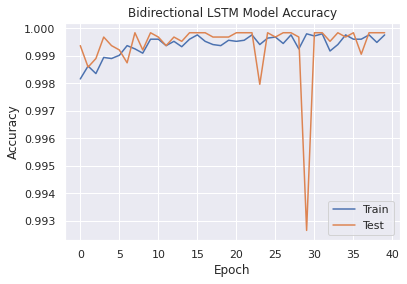

In [ ]:
# Plot training & validation accuracy values
print(history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Bidirectional LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('Bidirectional LSTM Model Accuracy.png')
plt.show()

Plot of loss
![plot of loss](https://github.com/santhisenan/DeepDefense/blob/master/BRNN_Model_Loss.png?raw=1)

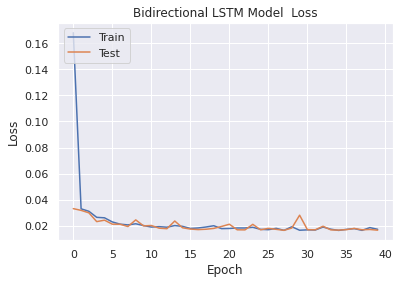

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Bidirectional LSTM Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Bidirectional LSTM Model Loss.png')
plt.show()


In [ ]:
predict = model.predict(X_test, verbose=1)

250/250 [==============================] - 2s 4ms/step


#  Calculate True positive,True negetive,False positive and False negetive values. Then, Create Heatmap with all those values.

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

#Printing and calculating various values

print('tp:',tp)
print('fn:',fn)
print('fp:',fp)
print('tn:',tn)
recall = tp/(tp+fn)
print('Recall:',recall)
precision = tp/(tp+fp)
print('Precision:',precision)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1_score)
FPR = fp/(fp + tn)
print('FPR:' ,FPR)
FNR = fn / (fn + tp)
print('FNR:' ,FNR)
far = (FPR+FNR)/2
print('far:' ,far)
accuracy = (tp+tn)/(tp+tn+fn+fp)
print('accuracy:',accuracy)

tp: 4001
fn: 1
fp: 2
tn: 3995
Recall: 0.9997501249375312
Precision: 0.9995003747189608
F1 score: 0.999625
FPR: 0.0005003752814610958
FNR: 0.0002498750624687656
far: 0.0003751251719649307
accuracy: 0.9996249531191399


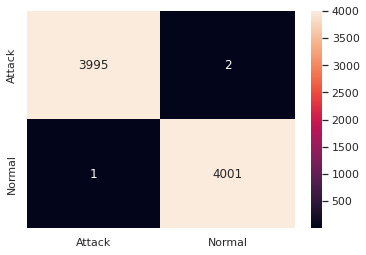

In [ ]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

# Save details 

In [ ]:
figure = ax.get_figure()    
figure.savefig('confusion_matrix_BRNN.png', dpi=400)

In [ ]:
model.save('brnn_model.h5')

In [ ]:
Y_test=Y_test.astype(float)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.96%
